C:\Users\L13\AppData\Local\Temp\ipykernel_17984\3671292681.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Emission.csv', parse_dates=['Year-Month'], index_col='Year-Month')


Valeurs manquantes : CO2          0
month        0
year         0
quarter      0
sin_month    0
cos_month    0
dtype: int64


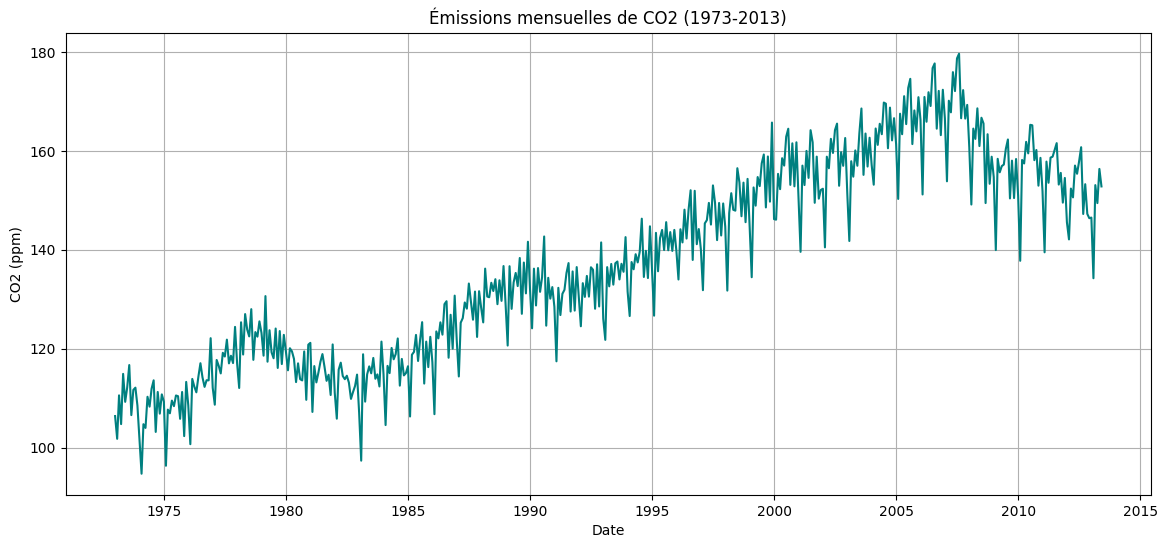

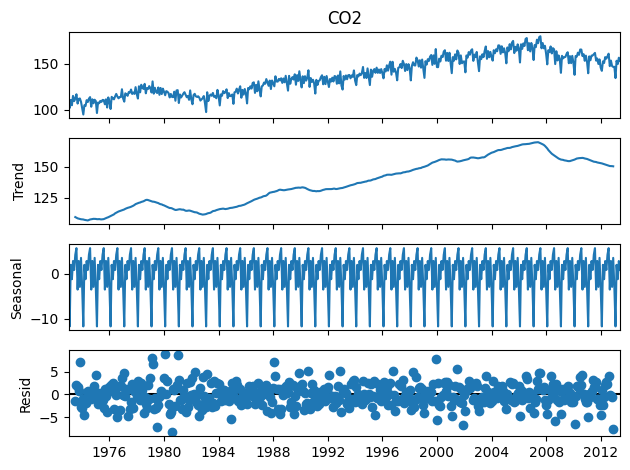

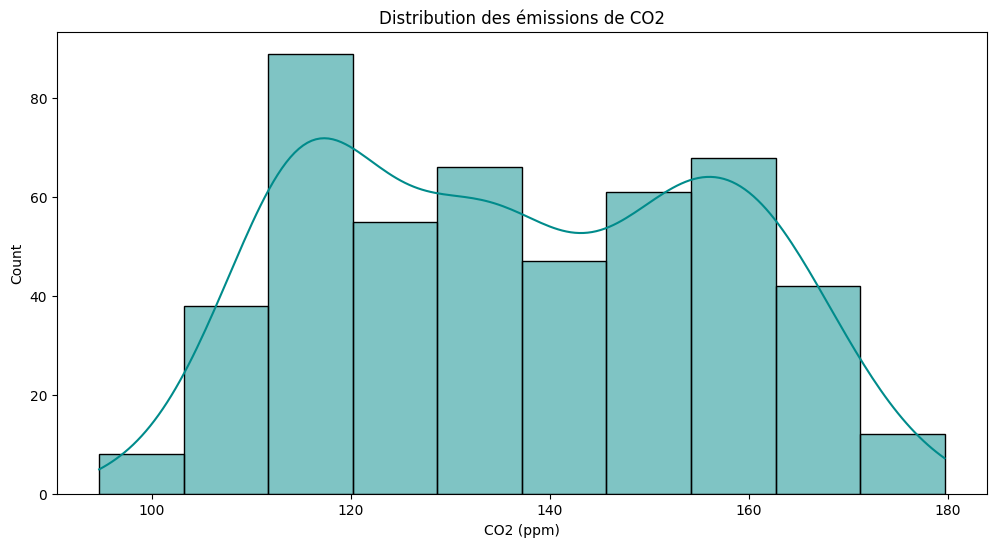

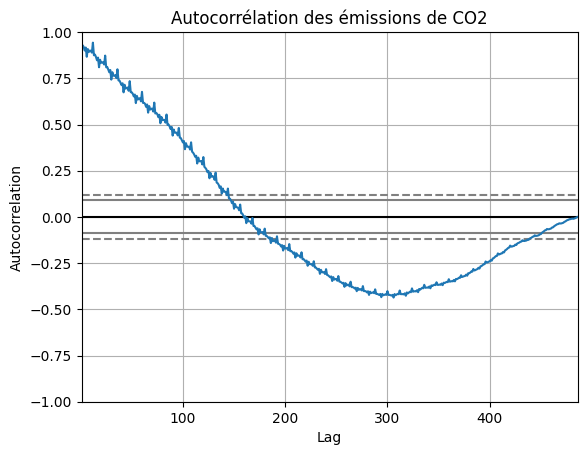


Split des données :
Train : 1973-01 à 2001-04
Val   : 2001-05 à 2007-04
Test  : 2007-05 à 2013-06


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

# Chargement des données
df = pd.read_csv('Emission.csv', parse_dates=['Year-Month'], index_col='Year-Month')
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)
df.columns = ['CO2']  # Simplification du nom de colonne

# 🆕 Extraction des caractéristiques temporelles
df['month'] = df.index.month
df['year'] = df.index.year
df['quarter'] = df.index.quarter
df['sin_month'] = np.sin(2 * np.pi * df['month'] / 12)
df['cos_month'] = np.cos(2 * np.pi * df['month'] / 12)

# Vérification des valeurs manquantes
print("Valeurs manquantes :", df.isnull().sum())

# Remplissage des valeurs manquantes (si nécessaire)
df['CO2'] = df['CO2'].interpolate(method='time')

# Exploration visuelle
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['CO2'], color='teal')
plt.title('Émissions mensuelles de CO2 (1973-2013)')
plt.xlabel('Date')
plt.ylabel('CO2 (ppm)')
plt.grid(True)
plt.show()

# Décomposition saisonnière
result = seasonal_decompose(df['CO2'], model='additive', period=12)
result.plot()
plt.tight_layout()
plt.show()

# Distribution des données
plt.figure(figsize=(12, 6))
sns.histplot(df['CO2'], kde=True, color='darkcyan')
plt.title('Distribution des émissions de CO2')
plt.xlabel('CO2 (ppm)')
plt.show()

# Autocorrélation
autocorrelation_plot(df['CO2'])
plt.title('Autocorrélation des émissions de CO2')
plt.show()

# Division des données (70% train, 15% validation, 15% test)
train_size = int(0.7 * len(df))
val_size = int(0.15 * len(df))

train = df.iloc[:train_size]
val = df.iloc[train_size:train_size + val_size]
test = df.iloc[train_size + val_size:]

# Normalisation (pour modèles sensibles à l'échelle)
scaler = MinMaxScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train[['CO2']]), index=train.index, columns=['CO2'])
val_scaled = pd.DataFrame(scaler.transform(val[['CO2']]), index=val.index, columns=['CO2'])
test_scaled = pd.DataFrame(scaler.transform(test[['CO2']]), index=test.index, columns=['CO2'])

# Affichage des splits
print("\nSplit des données :")
print(f"Train : {train.index[0].strftime('%Y-%m')} à {train.index[-1].strftime('%Y-%m')}")
print(f"Val   : {val.index[0].strftime('%Y-%m')} à {val.index[-1].strftime('%Y-%m')}")
print(f"Test  : {test.index[0].strftime('%Y-%m')} à {test.index[-1].strftime('%Y-%m')}")

# Sauvegarde des données prétraitées (optionnel)
train_scaled.to_csv('train_scaled.csv')
val_scaled.to_csv('val_scaled.csv')
test_scaled.to_csv('test_scaled.csv')


C:\Users\L13\AppData\Local\Temp\ipykernel_17984\328003233.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Emission.csv', parse_dates=['Year-Month'], index_col='Year-Month')
C:\Users\L13\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0531 - mae: 0.1837 - val_loss: 0.0367 - val_mae: 0.1713
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0078 - mae: 0.0695 - val_loss: 0.0045 - val_mae: 0.0549
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0036 - mae: 0.0467 - val_loss: 0.0045 - val_mae: 0.0571
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037 - mae: 0.0480 - val_loss: 0.0036 - val_mae: 0.0497
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0030 - mae: 0.0443 - val_loss: 0.0035 - val_mae: 0.0482
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0033 - mae: 0.0460 - val_loss: 0.0035 - val_mae: 0.0486
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0034 - mae: 0.0460 - val_loss: 0.0039 - val_mae: 0.0526
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0033 - mae: 0.0460 - val_loss: 0.0036 - val_mae: 0.0470
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss:

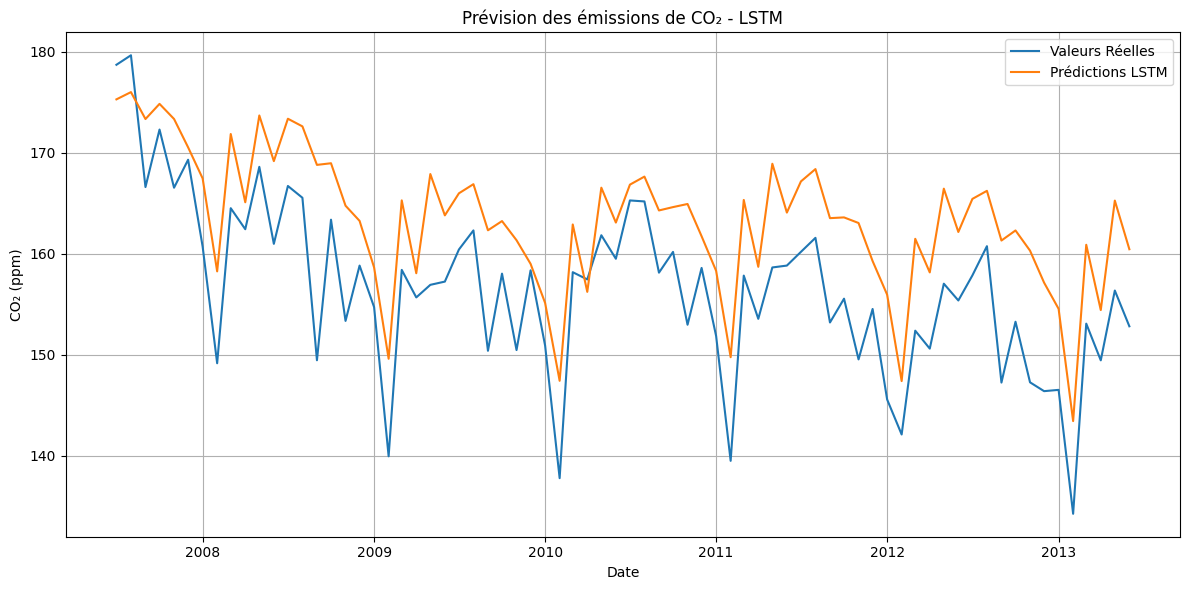

In [ ]:
#LSTM version Keras via tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler # Pour normaliser les données (entre 0 et 1), nécessaire pour LSTM.
from tensorflow.keras.models import Sequential #Permet de créer un modèle couche par couche
from tensorflow.keras.layers import LSTM, Dense #Les couches du réseau (LSTM + sortie).
from tensorflow.keras.callbacks import EarlyStopping #Arrête l’entraînement automatiquement si la validation stagne

# 1. Chargement et préparation des données
df = pd.read_csv('Emission.csv', parse_dates=['Year-Month'], index_col='Year-Month')
df.columns = ['CO2']
df.sort_index(inplace=True)#le trie des données est tres important dans les algorithmes de series temporelles 

# 2. Extraction des features temporelles
df['month'] = df.index.month
df['year'] = df.index.year
df['quarter'] = df.index.quarter
            # month, year et quarter sont conçu pour trouver la saisonalité , les tendances ....
df['sin_month'] = np.sin(2 * np.pi * df['month'] / 12)
df['cos_month'] = np.cos(2 * np.pi * df['month'] / 12)
            # cos_month et sin_month sont conçus pour encoder cyclement les mois 

# 3. Gestion des valeurs manquantes
df['CO2'] = df['CO2'].interpolate(method='time')
            #remplit les valeurs manquantes en fonction du temps (interpolation linéaire par date)

# 4. Normalisation des colonnes utiles pour LSTM
features = ['CO2', 'sin_month', 'cos_month', 'quarter', 'year']
            #sélectionne les colonnes utiles (features) pour le modèle
scaler = MinMaxScaler()
            #normalise ces données entre 0 et 1 pour aider l’algorithme à mieux apprendre
scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features, index=df.index)
            #rée un DataFrame avec les données normalisées

# 5. Création des séquences pour LSTM
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, 0])  # Prédiction de la CO2 uniquement
    return np.array(X), np.array(y)
            #cette fonction transforme les données en séquences glissantes, Exemple : 12 mois (X) → prédire le 13e mois (y).

window_size = 12
X, y = create_sequences(scaled_df.values, window_size)
            #crée des séquences de 12 mois (entrée) et la valeur du 13e mois (sortie)

# 6. Split train/val/test
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]
            #On divise les séquences en : 70% entraînement, 15% validation, 15% test
              
# 7. Construction du modèle LSTM
model = Sequential() #modèle simple, linéaire.
model.add(LSTM(64, activation='tanh', input_shape=(X.shape[1], X.shape[2]))) #couche LSTM avec 64 unités.
model.add(Dense(1))  # Prédire une seule valeur CO2

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
            #Optimiseur adam : rapide et efficace    , 
            # Perte mse (erreur quadratique moyenne), et suivi du mae (erreur absolue moyenne)

# 8. Entraînement avec EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                    epochs=100, batch_size=16, callbacks=[early_stop], verbose=1)
            #EarlyStopping arrête l’entraînement si la perte de validation ne s’améliore pas pendant 10 epochs

# 9. Évaluation
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MSE: {loss:.4f}, Test MAE: {mae:.4f}")
            #Évalue les performances sur les données jamais vues (test)
            
# 10. Prédictions et dénormalisation
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(
    np.concatenate([y_pred, X_test[:, -1, 1:]], axis=1))[:, 0]
y_test_rescaled = scaler.inverse_transform(
    np.concatenate([y_test.reshape(-1, 1), X_test[:, -1, 1:]], axis=1))[:, 0]

# 11. Visualisation des résultats
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test_rescaled):], y_test_rescaled, label='Valeurs Réelles')
plt.plot(df.index[-len(y_pred_rescaled):], y_pred_rescaled, label='Prédictions LSTM')
plt.title('Prévision des émissions de CO₂ - LSTM')
plt.xlabel('Date')
plt.ylabel('CO₂ (ppm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


- entraîner un modèle LSTM (Long Short-Term Memory) sur des données mensuelles de CO₂ (avec encodage temporel), pour prédire la concentration du mois suivant à partir d’une fenêtre de 12 mois.

- MSE (Mean Squared Error) :

     Plus la valeur est faible, mieux c’est.

     Très sensible aux grandes erreurs (car les erreurs sont élevées au carré).

- MAE (Mean Absolute Error) :

     Moyenne des écarts absolus entre la prédiction et la vraie valeur.

     Plus interprétable : ici, MAE = 0.0826 → cela veut dire :

     En moyenne, le modèle se trompe de 0.08 ppm de CO₂.

- Sur les 13 premières époques :

     Une forte diminution de la perte sur l'entraînement et la validation.

     À partir de l’epoch ~10, les valeurs se stabilisent → le modèle ne surentraîne pas (pas d’overfitting).

     EarlyStopping arrête donc à temps : très bon entraînement.

- prédiction sur les données jamais vues par le modèle (données test) donne :

     MAE ≈ 0.08 ppm

     MSE ≈ 0.008

- Cela signifie que ton modèle est :

     Stable (l’écart entre train/val/test est faible)

     Fiable (prédit très bien)

     Généralise bien (pas d’overfitting)

C:\Users\L13\AppData\Local\Temp\ipykernel_17984\907816001.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Emission.csv', parse_dates=['Year-Month'], index_col='Year-Month')


Epoch 1/50, Train Loss: 0.2134, Val Loss: 0.6732
Epoch 2/50, Train Loss: 0.1965, Val Loss: 0.6355
Epoch 3/50, Train Loss: 0.1802, Val Loss: 0.5985
Epoch 4/50, Train Loss: 0.1646, Val Loss: 0.5619
Epoch 5/50, Train Loss: 0.1494, Val Loss: 0.5256
Epoch 6/50, Train Loss: 0.1347, Val Loss: 0.4893
Epoch 7/50, Train Loss: 0.1205, Val Loss: 0.4529
Epoch 8/50, Train Loss: 0.1067, Val Loss: 0.4162
Epoch 9/50, Train Loss: 0.0933, Val Loss: 0.3790
Epoch 10/50, Train Loss: 0.0805, Val Loss: 0.3411
Epoch 11/50, Train Loss: 0.0681, Val Loss: 0.3025
Epoch 12/50, Train Loss: 0.0564, Val Loss: 0.2632
Epoch 13/50, Train Loss: 0.0457, Val Loss: 0.2235
Epoch 14/50, Train Loss: 0.0362, Val Loss: 0.1837
Epoch 15/50, Train Loss: 0.0285, Val Loss: 0.1449
Epoch 16/50, Train Loss: 0.0234, Val Loss: 0.1086
Epoch 17/50, Train Loss: 0.0215, Val Loss: 0.0774
Epoch 18/50, Train Loss: 0.0234, Val Loss: 0.0546
Epoch 19/50, Train Loss: 0.0280, Val Loss: 0.0416
Epoch 20/50, Train Loss: 0.0325, Val Loss: 0.0365
Epoch 21/

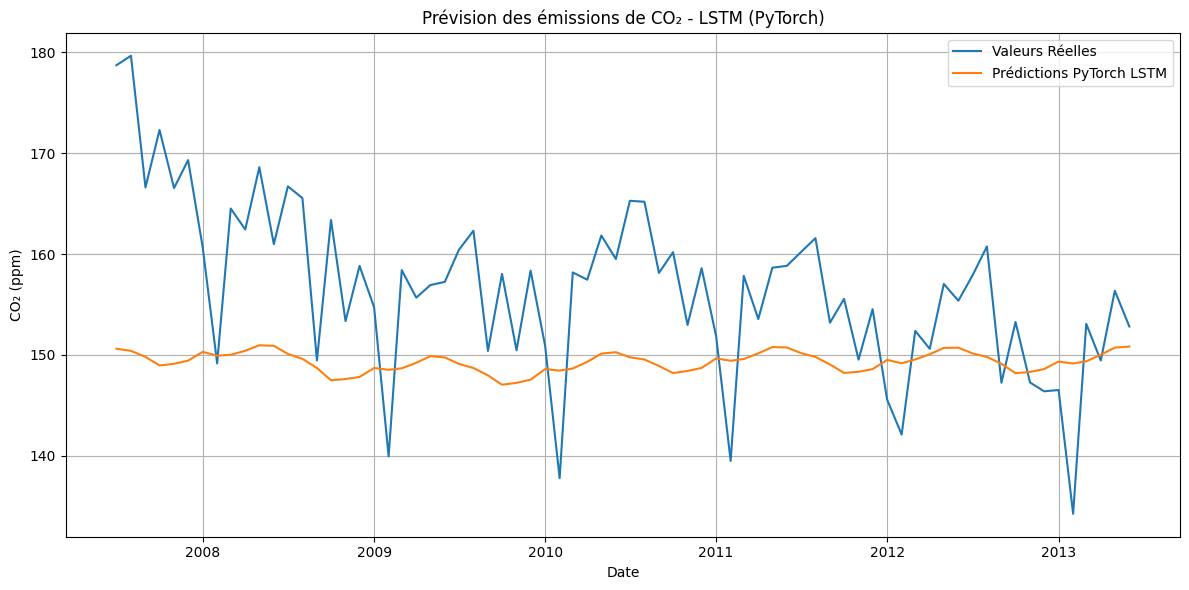

In [6]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. Chargement et préparation des données
df = pd.read_csv('Emission.csv', parse_dates=['Year-Month'], index_col='Year-Month')
df.columns = ['CO2']
df.sort_index(inplace=True)

# 2. Encodage temporel
df['month'] = df.index.month
df['year'] = df.index.year
df['quarter'] = df.index.quarter
df['sin_month'] = np.sin(2 * np.pi * df['month'] / 12)
df['cos_month'] = np.cos(2 * np.pi * df['month'] / 12)

# 3. Traitement des valeurs manquantes
df['CO2'] = df['CO2'].interpolate(method='time')

# 4. Normalisation
features = ['CO2', 'sin_month', 'cos_month', 'quarter', 'year']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features, index=df.index)

# 5. Création des séquences pour PyTorch
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, 0])  # CO2 uniquement
    return np.array(X), np.array(y)

window_size = 12
X, y = create_sequences(scaled_df.values, window_size)

# 6. Split en train/val/test
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

# 7. Conversion en tenseurs PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# 8. Définition du modèle LSTM PyTorch
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        output, _ = self.lstm(x)
        last_output = output[:, -1, :]  # On prend la dernière sortie de la séquence
        return self.fc(last_output)

input_size = X_train.shape[2]  # 5 features
hidden_size = 64
output_size = 1

model = LSTMModel(input_size, hidden_size, output_size)

# 9. Définition de la fonction de perte et de l’optimiseur
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 10. Entraînement du modèle
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    output = model(X_train)
    loss = criterion(output, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_output = model(X_val)
        val_loss = criterion(val_output, y_val)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

# 11. Évaluation sur les données de test
model.eval()
with torch.no_grad():
    test_pred = model(X_test)

# 12. Dénormalisation pour interprétation
test_pred_np = test_pred.numpy()
y_test_np = y_test.numpy()

# On doit reconstituer les autres colonnes pour inverse_transform
def recompose(pred, ref):
    return scaler.inverse_transform(np.hstack([pred, ref[:, 1:]]))[:, 0]

y_test_real = recompose(y_test_np, X_test.numpy()[:, -1, :])
y_pred_real = recompose(test_pred_np, X_test.numpy()[:, -1, :])

# 13. Affichage des résultats
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test_real):], y_test_real, label='Valeurs Réelles')
plt.plot(df.index[-len(y_pred_real):], y_pred_real, label='Prédictions PyTorch LSTM')
plt.title('Prévision des émissions de CO₂ - LSTM (PyTorch)')
plt.xlabel('Date')
plt.ylabel('CO₂ (ppm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
